# Rishabh Agrawal
# Assignment 3

# Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from sklearn.utils import shuffle
import sklearn.linear_model as Lm
from sklearn.linear_model import LinearRegression as Lr
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pycountry_convert as pc
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [96]:
p1

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
5,100009,N,1,01121,142,45180,Al Inst Deaf And Blind,Alabama,AL,N,...,N,N,N,N,N,N,N,N,N,N
6,100011,01503710100000,1,01073,142,13820,Leeds City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
7,100012,01504810100000,1,01095,290,10700,Boaz City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
8,100013,01503710200000,1,01073,142,13820,Trussville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
9,100015,N,1,01073,142,13820,SafetyNet Academy,Alabama,AL,N,...,N,N,N,N,N,N,N,N,N,N


# Problem 1

In [9]:
p1 = pd.read_table("Files/Sdf16_1a.txt")

C:\Users\risha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
stateFund = p1.groupby("STNAME").sum()
stateFund['perStud'] = stateFund['TFEDREV']/stateFund['V33']
sF = pd.DataFrame(stateFund['TFEDREV']).sort_values(by=['TFEDREV'])
sT = pd.DataFrame(stateFund['V33']).sort_values(by=['V33'])
perStud = pd.DataFrame(stateFund['perStud']).sort_values(by=['perStud'])

Text(0.5,0,'Total Federal Revenue')

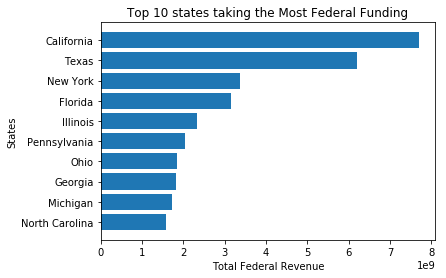

In [69]:
newsF = sF.tail(10)
plt.barh(newsF.index, newsF['TFEDREV'])
plt.title("Top 10 states taking the Most Federal Funding")
plt.ylabel("States")
plt.xlabel("Total Federal Revenue")

Text(0.5,0,'Federal Revenue per Student')

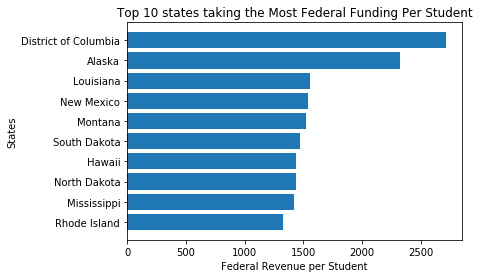

In [68]:
pS = perStud.tail(10)
plt.barh(pS.index, pS['perStud'])
plt.title("Top 10 states taking the Most Federal Funding Per Student")
plt.ylabel("States")
plt.xlabel("Federal Revenue per Student")

# Problem 2

In [97]:
p2 = p1.groupby("NAME").sum()

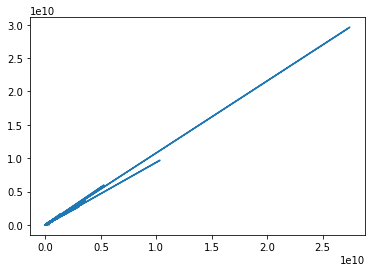

In [100]:
plt.plot(p2['TOTALREV'],p2['TOTALEXP'])
plt.title("Top 10 states taking the Most Federal Funding Per Student")
plt.ylabel("States")
plt.xlabel("Federal Revenue per Student")

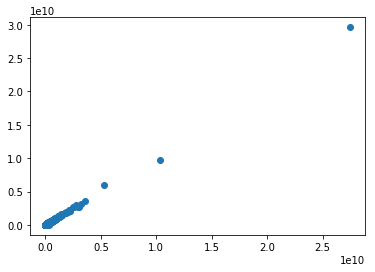

In [101]:
plt.scatter(p2['TOTALREV'],p2['TOTALEXP'])
plt.title("Top 10 states taking the Most Federal Funding Per Student")
plt.ylabel("States")
plt.xlabel("Federal Revenue per Student")

In [87]:
debtStu = p1.groupby("STNAME").sum()
debtStu['Total Debt per Student'] = (debtStu['TOTALEXP'] - debtStu['TOTALREV']) / debtStu['V33']
dS = pd.DataFrame(debtStu['Total Debt per Student']).sort_values(by=['Total Debt per Student'])

,Total Debt per Student
STNAME,
Washington,265.801263
Alabama,346.284944
New York,504.916474
North Carolina,506.761787
Montana,543.625086
Minnesota,746.329846
Nebraska,764.693409
Alaska,968.643614
District of Columbia,1285.117970


### This states have the most debt per Student

Text(0.5,0,'Debt per Student')

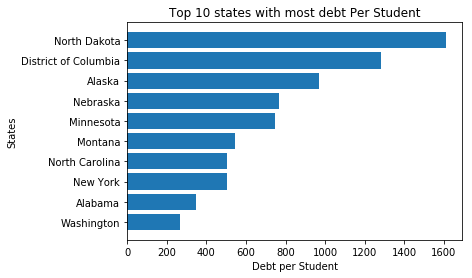

In [90]:
dS1 = dS.tail(10)
plt.barh(dS1.index, dS1['Total Debt per Student'])
plt.title("Top 10 states with most debt Per Student")
plt.ylabel("States")
plt.xlabel("Debt per Student")

In [91]:
dS

,Total Debt per Student
STNAME,
Hawaii,-1634.248194
Indiana,-1091.025064
Connecticut,-1082.443045
Michigan,-942.548776
California,-627.333637
Idaho,-579.701662
Massachusetts,-520.190411
Maine,-492.184424
Maryland,-474.226382


# Problem 3

In [174]:
p3 = pd.read_csv("Files/math-achievement-lea-sy2015-16.csv")

In [175]:
def removeBlur(df):
    ans = []
    maxV = 100
    minV = 0
    for i in df:
        if ('GE' in i):
            a = i.split("GE")[1]
            a = int(a)
            ans.append((a+maxV)/2)
        elif ('GT' in i):
            a = i.split("GT")[1]
            a = int(a)
            ans.append((a+1+maxV)/2)
        elif ('LE' in i):
            a = i.split("LE")[1]
            a = int(a)
            ans.append((a+minV)/2)
        elif ('LT' in i):
            a = i.split("LT")[1]
            a = int(a)
            ans.append((a-1+minV)/2)
        elif ('-' in i):
            a = i.split("-")
            ans.append((int(a[0]) + int(a[1])) / 2)
        elif (i.isdigit()):
            ans.append(int(i))
        else:
            ans.append(0)
    return ans    

In [176]:
p3['ALL_MTH00PCTPROF_1516'] = removeBlur(p3['ALL_MTH00PCTPROF_1516'])

Text(0,0.5,'Count of Schools')

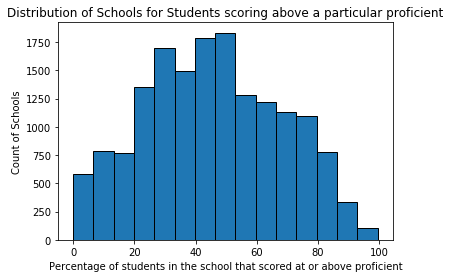

In [181]:
plt.hist(p3['ALL_MTH00PCTPROF_1516'],  bins=15, edgecolor="k")
plt.title("Distribution of Schools for Students scoring above a particular proficient")
plt.xlabel("Percentage of students in the school that scored at or above proficient")
plt.ylabel("Count of Schools")

# Problem 4

In [146]:
max(list(p3['ALL_MTH00PCTPROF_1516']))

99.5

# Problem 5